# Gradientenabstiegsverfahren (Gradient Decent)
# Am Beispiel der Linearen Regression


 Datensatz "Umsatz Speiseeis in Abhängigkeit von der Temperatur

Variablen:
- X: Temmperatur, y: Umsatz
- m: Steigung der gesuchten Regressionsgeraden
- t: Y-Achsenabschnitt
- alpha: Lernrate
- max_iter: Maximale Anzahl Iterationen
- max_error: Maximaler Fehler (bricht ab, wenn eines der beiden Werte erreicht)
- d_m: jeweils aktueller Wert für m eingesetzt in die 1. Ableitung der Fehlerfunktion
- d_t: jeweils aktueller Wert für t eingesetzt in die 1. Ableitung der Fehlerfunktion
- N: Anzahl der Beobachtungen

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datensatz laden
url = "https://raw.githubusercontent.com/troescherw/datasets/master/speiseeis_umsatz.csv"

data = pd.read_csv(url)
X = data.Temperatur
y = data.Umsatz


In [7]:
# Funktion für m (Steigung) und t(Y-Achsenabschnitt) der Regressionsgeraden
def gradient_descent(X, y, alpha=0.001, max_iter=1000):
    m = t = 0
    N = len(y)
    i = 0
    d_m = 1000
    
    for _ in range(max_iter): 
        y_pred = m*X + t  # Vorhergesagte Y-Werte
        d_m = (-2/N) * np.sum(X * (y - y_pred))  # eingesetzt in part. Ableitung für m
        d_t = (-2/N) * np.sum(y - y_pred)  # eingesezt in part. Ableitung für t
        
        m = m - alpha * d_m  # Berechne neues m
        t = t - alpha * d_t  # Berechne neues t
        
    return np.round(m,4), np.round(t,4)

In [12]:
# Berechne m und t für Beispieldatensatz
m, t = gradient_descent(X,y,  0.001, 10000)
print("Ergebnisse:")
print(f"m={m}, t={t}")

Ergebnisse:
m=2.2714, t=-7.3579


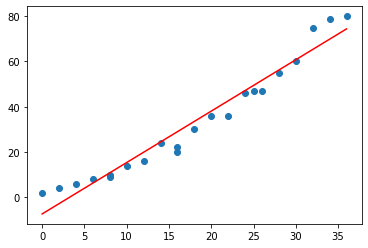

In [13]:
# Plot der Regressionsgerade:

y_hat_1 = np.min(X) * m + t
y_hat_2 = np.max(X) * m + t
plt.plot([np.min(X), np.max(X)], [y_hat_1, y_hat_2], color="r")
plt.scatter(X,y)
plt.show()  

In [14]:
# Vergleich mit Ergebnis von sklearn.linear_model.LinearRegression
import statsmodels.formula.api as smf
model = smf.ols("Umsatz~Temperatur", data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     414.7
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           7.65e-15
Time:                        17:24:05   Log-Likelihood:                -67.691
No. Observations:                  22   AIC:                             139.4
Df Residuals:                      20   BIC:                             141.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4001      2.305     -3.211      0.0